#1. Load the dataset
Dataset link : https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download  

Downloaded from kaggle

In [59]:
#Importing Libraries
import pandas as pd
import numpy as np


In [60]:
df=pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [61]:
df.shape

(545, 13)

In [62]:
df.columns.tolist()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [63]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [64]:
# Encode binary columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


<ipython-input-64-866cd8bc2932>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})


In [65]:
# Convert the 'furnishingstatus_*' columns to 0/1
df['furnishingstatus_semi-furnished'] = df['furnishingstatus_semi-furnished'].astype(int)
df['furnishingstatus_unfurnished'] = df['furnishingstatus_unfurnished'].astype(int)

In [66]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#2. Visualizing Data

**1.Correlation matrix**

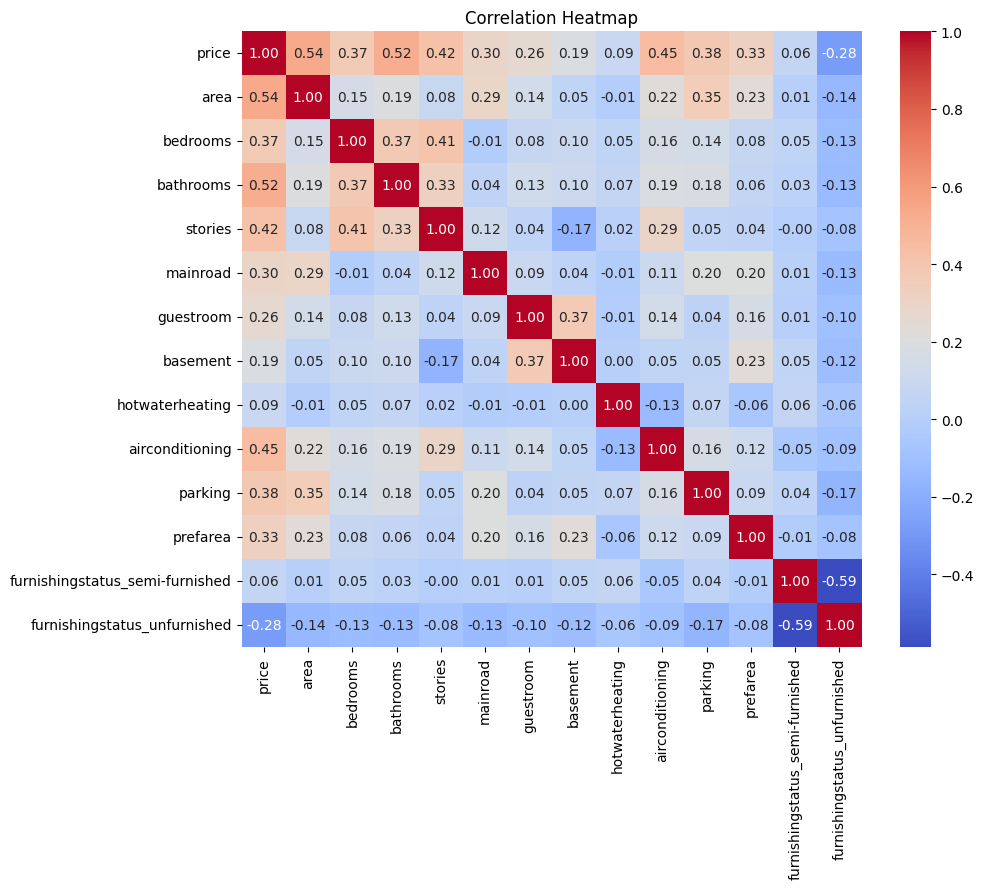

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**2. Price vs Area ScatterPlot**

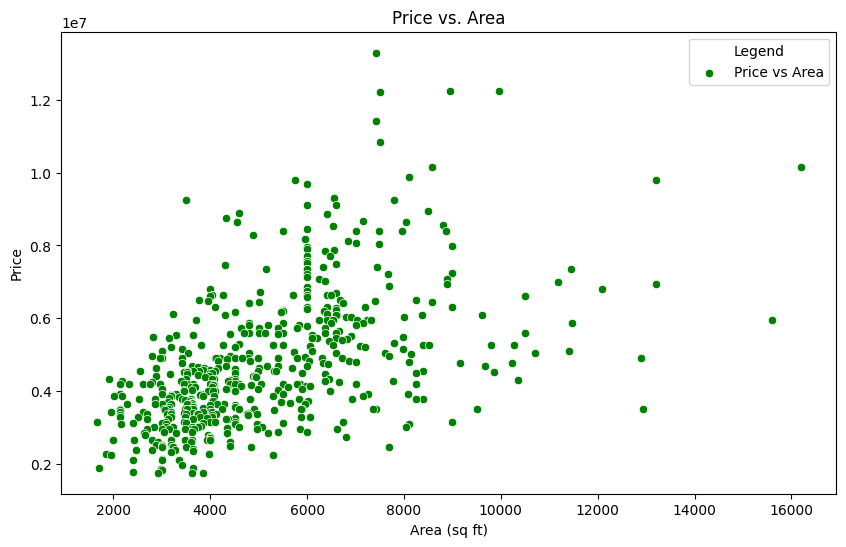

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, color='green', label='Price vs Area')
plt.title('Price vs. Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Legend')
plt.show()


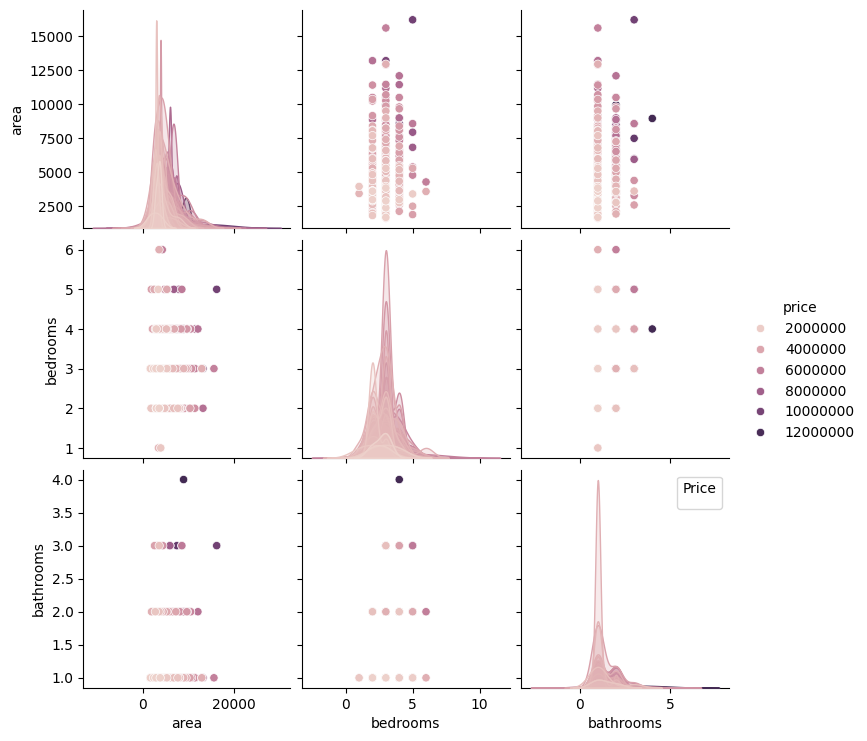

In [69]:
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms']], diag_kind='kde', hue='price')
plt.legend(title='Price')
plt.show()


In [70]:
df['price'] = np.log1p(df['price'])

In [71]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,16.321037,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,16.321037,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,0,0


#3.Training our data

**1. Train test split**

In [72]:
# Separate the features (X) and the target variable (y)
X = df.drop('price', axis=1)  # Features (excluding the target variable)
y = df['price']  # Target variable


In [73]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model used: Linear Regression**





In [75]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()


In [76]:
# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the prices using the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 0.19990267828473013
Mean Squared Error (MSE): 0.06329354097113252
R-squared (R²): 0.6722047416501394


In [78]:
error_percentage = np.expm1(0.1999)  # Convert log MAE back to original scale
print(f"Approximate relative error: {error_percentage:.2%}")


Approximate relative error: 22.13%


#4.Flask Application

In [79]:
#Installing libraries
!pip install flask
!pip install flask-ngrok
!pip install pyngrok

In [80]:
import joblib
import pickle

# Save the model to a .pkl file
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

**Seeting up ngork**

Google Colab is not designed to directly support Flask applications, as it is a cloud-based environment meant for running Jupyter notebooks.with the help of tools like ngrok we can run flask app

In [81]:
from pyngrok import ngrok
# Replace with your new token (do not hardcode it in your scripts in public repos)
ngrok.set_auth_token("2lejz8SlhBFknVrtcY5Gj5apbNf_77zn2aaBfrkect416KwZq")


In [84]:
# Import required modules
import os
from flask import Flask, render_template, request


# Save the model as `model.pkl`
with open("/content/house_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Create the HTML file dynamically
os.makedirs("templates", exist_ok=True)
with open("templates/a.html", "w") as f:
    f.write("""
    <!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>House Price Prediction</title>
</head>
<body style="font-family: Arial, sans-serif; background: linear-gradient(to bottom, #c9d6ff, #e2e2e2); display: flex; justify-content: center; align-items: center; min-height: 100vh; margin: 0;">

  <div style="background: #fff; border-radius: 8px; padding: 20px 40px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); width: 100%; max-width: 500px;">
    <h1 style="text-align: center; margin-bottom: 20px; font-size: 24px; color: #333;">House Price Prediction</h1>
    <form action="/predict" method="POST" style="display: flex; flex-direction: column;">

      <label for="area" style="margin-top: 10px; font-weight: bold;">Area (in sqft):</label>
      <input type="number" id="area" name="area" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">

      <label for="bedrooms" style="margin-top: 10px; font-weight: bold;">Bedrooms:</label>
      <input type="number" id="bedrooms" name="bedrooms" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">

      <label for="bathrooms" style="margin-top: 10px; font-weight: bold;">Bathrooms:</label>
      <input type="number" id="bathrooms" name="bathrooms" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">

      <label for="stories" style="margin-top: 10px; font-weight: bold;">Stories:</label>
      <input type="number" id="stories" name="stories" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">

      <label for="parking" style="margin-top: 10px; font-weight: bold;">Parking Spaces:</label>
      <input type="number" id="parking" name="parking" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">

      <label for="mainroad" style="margin-top: 10px; font-weight: bold;">Main Road:</label>
      <select id="mainroad" name="mainroad" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="guestroom" style="margin-top: 10px; font-weight: bold;">Guest Room:</label>
      <select id="guestroom" name="guestroom" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="basement" style="margin-top: 10px; font-weight: bold;">Basement:</label>
      <select id="basement" name="basement" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="hotwaterheating" style="margin-top: 10px; font-weight: bold;">Hot Water Heating:</label>
      <select id="hotwaterheating" name="hotwaterheating" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="airconditioning" style="margin-top: 10px; font-weight: bold;">Air Conditioning:</label>
      <select id="airconditioning" name="airconditioning" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="prefarea" style="margin-top: 10px; font-weight: bold;">Preferred Area:</label>
      <select id="prefarea" name="prefarea" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="furnishingstatus" style="margin-top: 10px; font-weight: bold;">Furnishing Status:</label>
      <select id="furnishingstatus" name="furnishingstatus" required style="margin-top: 5px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; font-size: 14px;">
        <option value="furnished">Furnished</option>
        <option value="semi-furnished">Semi-Furnished</option>
        <option value="unfurnished">Unfurnished</option>
      </select>

      <button type="submit" style="margin-top: 20px; padding: 10px; border: none; border-radius: 5px; background-color: #007BFF; color: white; font-size: 16px; cursor: pointer;">
        Predict Price
      </button>
    </form>

    {% if predicted_price %}
      <h2 style="margin-top: 20px; color: #333;">Predicted House Price: ${{ predicted_price }}</h2>
    {% endif %}
  </div>
</body>
</html>

    """)

# Load the model
model_path = "/content/house_price_model.pkl"
with open(model_path, "rb") as f:
    model = pickle.load(f)

# Initialize Flask app
app = Flask(__name__)

# Serve the home page
@app.route("/")
def home():
    return render_template("a.html")

# Prediction endpoint
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Extract form data
        area = float(request.form['area'])
        bedrooms = int(request.form['bedrooms'])
        bathrooms = int(request.form['bathrooms'])
        stories = int(request.form['stories'])
        mainroad = int(request.form['mainroad'] == 'yes')
        guestroom = int(request.form['guestroom'] == 'yes')
        basement = int(request.form['basement'] == 'yes')
        hotwaterheating = int(request.form['hotwaterheating'] == 'yes')
        airconditioning = int(request.form['airconditioning'] == 'yes')
        parking = int(request.form['parking'])
        prefarea = int(request.form['prefarea'] == 'yes')

        # Get the furnishing status from the form
        furnishingstatus = request.form['furnishingstatus']

        # Initialize the one-hot encoded columns for furnishing status
        furnishingstatus_furnished = 0
        furnishingstatus_semifurnished = 0
        furnishingstatus_unfurnished = 0

        if furnishingstatus == "furnished":
            furnishingstatus_furnished = 1
        elif furnishingstatus == "semi-furnished":
            furnishingstatus_semifurnished = 1
        else:
            furnishingstatus_unfurnished = 1

        # Prepare the input data as a numpy array
        input_data = np.array([
            [
                area, bedrooms, bathrooms, stories, mainroad, guestroom,
                basement, hotwaterheating, airconditioning, parking,
                prefarea, furnishingstatus_furnished,
                furnishingstatus_semifurnished,
            ]
        ])

        # Make the prediction
        predicted_price = np.exp(model.predict(input_data))


        return render_template("a.html", predicted_price=round(predicted_price[0], 2))

    except Exception as e:
        return f"<h1>Error: {str(e)}</h1>"

# Expose the app to the internet
public_url = ngrok.connect(5000)
print(f" * ngrok tunnel \"{public_url}\" ")

# Run the app
if __name__ == "__main__":
    app.run(port=5000)


 * ngrok tunnel "NgrokTunnel: "https://8837-34-67-128-247.ngrok-free.app" -> "http://localhost:5000"" 
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [07/Jan/2025 13:14:45] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Jan/2025 13:14:45] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [07/Jan/2025 13:15:30] "POST /predict HTTP/1.1" 200 -
